In [1]:
import os

os.chdir("/".join(["D:", "Users", "nicol", "Documents", "Uni", "Master", "3rd Semester", "Thesis"]))
print(os.getcwd())

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis


In [2]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.backend import clear_session

In [4]:
train, test = tf.keras.datasets.cifar10.load_data()
train_images, train_labels = train
valid_test_images, valid_test_labels = test
train_images = train_images / 255.
valid_test_images = valid_test_images / 255.
valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]
print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (5000, 32, 32, 3) (5000, 32, 32, 3)
(50000, 1) (5000, 1) (5000, 1)


In [5]:
img_rows = img_cols = 32
channels = 3

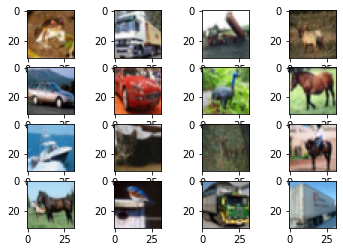

In [6]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i])
plt.show()

In [7]:
tf.compat.v1.reset_default_graph() 
clear_session()

input_layer = Input(shape=(img_rows, img_cols, channels))
x = Flatten()(input_layer)

x = Dense(units=4000, activation="relu", use_bias=True)(x)
x = Dense(units=1000, activation="linear", use_bias=True)(x)
x = Dense(units=4000, activation="relu", use_bias=True)(x)

prediction_layer = Dense(10, activation='softmax', use_bias=True)(x)

model_bias = Model(inputs=input_layer, outputs=prediction_layer)
model_bias.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4000)              12292000  
                                                                 
 dense_1 (Dense)             (None, 1000)              4001000   
                                                                 
 dense_2 (Dense)             (None, 4000)              4004000   
                                                                 
 dense_3 (Dense)             (None, 10)                40010     
                                                                 
Total params: 20,337,010
Trainable params: 20,337,010
Non-tra

In [8]:
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [10]:
loss = sparse_categorical_crossentropy 
optimizer = SGD()
model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])
model.save("cifar10_before_training.h5")

In [12]:
history_bias = model_bias.fit(x=train_images, y=train_labels, validation_data=(valid_images, valid_labels), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8037 - sparse_categorical_accuracy: 0.3566 - val_loss: 1.6480 - val_sparse_categorical_accuracy: 0.4118
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6067 - sparse_categorical_accuracy: 0.4322 - val_loss: 1.6247 - val_sparse_categorical_accuracy: 0.4288
Epoch 3/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5227 - sparse_categorical_accuracy: 0.4619 - val_loss: 1.4941 - val_sparse_categorical_accuracy: 0.4738
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4581 - sparse_categorical_accuracy: 0.4851 - val_loss: 1.4232 - val_sparse_categorical_accuracy: 0.5046
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4085 - sparse_categorical_accuracy: 0.5046 - val_loss: 1.4413 - val_sparse_categorical_accuracy: 0.4926
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3624 -

In [13]:
y_pred_bias = model_bias.predict(test_images)

157/157 [==============================] - 0s 1ms/step


In [14]:
accuracy_score(np.argmax(y_pred_bias, axis=1), test_labels)

0.5854

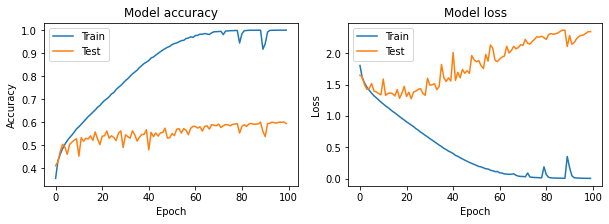

In [15]:
plot_history(history_bias, "2nd")

In [21]:
tf.compat.v1.reset_default_graph() 
clear_session()

input_layer = Input(shape=(img_rows, img_cols, channels))
x = Flatten()(input_layer)

x = Dense(units=4000, activation="relu", use_bias=False)(x)
x = Dense(units=1000, activation="linear", use_bias=False)(x)
x = Dense(units=4000, activation="relu", use_bias=False)(x)

prediction_layer = Dense(10, activation='softmax', use_bias=False)(x)

model = Model(inputs=input_layer, outputs=prediction_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4000)              12288000  
                                                                 
 dense_1 (Dense)             (None, 1000)              4000000   
                                                                 
 dense_2 (Dense)             (None, 4000)              4000000   
                                                                 
 dense_3 (Dense)             (None, 10)                40000     
                                                                 
Total params: 20,328,000
Trainable params: 20,328,000
Non-tra

In [22]:
loss = sparse_categorical_crossentropy 
optimizer = SGD()
model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])
model.save("cifar10_before_training.h5")

In [18]:
history = model.fit(x=train_images, y=train_labels, validation_data=(valid_images, valid_labels), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8063 - sparse_categorical_accuracy: 0.3573 - val_loss: 1.6647 - val_sparse_categorical_accuracy: 0.4112
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6131 - sparse_categorical_accuracy: 0.4308 - val_loss: 1.5771 - val_sparse_categorical_accuracy: 0.4384
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5323 - sparse_categorical_accuracy: 0.4594 - val_loss: 1.5657 - val_sparse_categorical_accuracy: 0.4468
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4726 - sparse_categorical_accuracy: 0.4814 - val_loss: 1.4767 - val_sparse_categorical_accuracy: 0.4786
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4230 - sparse_categorical_accuracy: 0.4985 - val_loss: 1.4248 - val_sparse_categorical_accuracy: 0.4954
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3799 -

In [19]:
y_pred = model.predict(test_images)
accuracy_score(np.argmax(y_pred, axis=1), test_labels)

157/157 [==============================] - 0s 1ms/step


0.5816

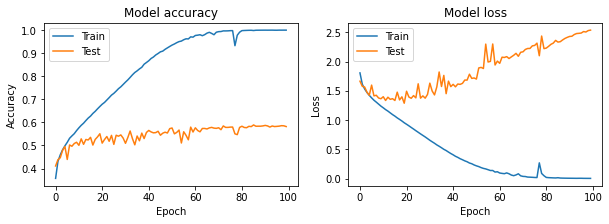

In [20]:
plot_history(history, "No bias")